<BarContainer object of 12 artists>

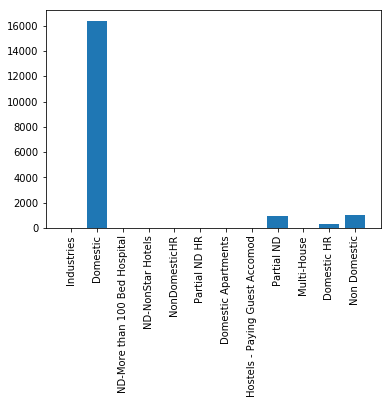

In [8]:
from operator import add
import matplotlib.pyplot as plt
import pandas as pd

xheaders=[]
barPlotValue=[]
#rdd1 = sc.textFile("hdfs:///user/shreyas/Billed_Consumption_SW4_sub-division.csv")
rdd1 = sc.textFile("/home/shayal/Billed_Consumption_SW4_sub-division.csv")
rdd2=rdd1.filter(lambda c:"-1" not in c).filter(lambda c:"-2" not in c).filter((lambda c:",0," not in c))
rdd3=rdd2.map(lambda x: (x.split(",")[1], 1))
rdd4=rdd3.reduceByKey(add)
rdd5=rdd4.map(lambda c:c[0]+","+str(c[1]))
rdd5.coalesce(1).saveAsTextFile("/home/shayal/countConnections")
with open("/home/shayal/countConnections/part-00000") as f:
    for line in f:
        data=line.strip().split(",")
        xheaders.append(data[0])
        barPlotValue.append(int(data[1]))
		
plt.xticks(rotation=90)
plt.bar(xheaders,barPlotValue)
		